In [1]:
pip install PyPortfolioOpt

In [33]:
pip install cvxopt


Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.15 in d:\anaconda\lib\site-packages (from cvxpy) (1.20.3)



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import cvxopt as opt # optimization library
from cvxopt import blas, solvers

In [5]:
from pypfopt import HRPOpt,expected_returns, risk_models, plotting,EfficientFrontier,EfficientCVaR,CLA

In [6]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0)

In [7]:
data.shape

(1106, 13)

In [8]:
data.head()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
Date,,,,,,,,,,,,,
30/03/2022,1.175,47102.00,0.06855,2.843,26.37,0.2302,16.73,191.0,0.8490,3360.22,430.2,128.4,49.18
29/03/2022,1.191,47434.80,0.06936,2.894,26.84,0.2331,16.98,196.3,0.8577,3400.51,434.2,130.1,49.28
28/03/2022,1.170,47122.21,0.06910,2.860,25.33,0.2298,16.50,192.2,0.8641,3332.92,430.2,127.6,47.07
27/03/2022,1.184,46827.76,0.06899,2.670,26.05,0.2297,16.87,210.3,0.8580,3295.65,430.5,129.7,48.00
26/03/2022,1.152,44511.27,0.06632,2.513,24.73,0.2157,15.83,204.8,0.8327,3145.00,415.8,124.8,47.18


In [9]:
print('Null Values =',data.isnull().values.any())
data.shape

Null Values = False


(1106, 13)

In [10]:
datareturns = data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
Date,,,,,,,,,,,,,
30/03/2022,0.727370,1.172967,0.743158,-0.646133,0.110597,0.303937,0.315590,1.737940,0.958818,1.476540,1.272722,0.291457,1.333673
29/03/2022,0.748485,1.190471,0.767793,-0.611935,0.134281,0.324058,0.337501,1.833021,0.983524,1.505479,1.292360,0.317662,1.338256
28/03/2022,0.720772,1.174030,0.759885,-0.634733,0.058192,0.301161,0.295433,1.759468,1.001699,1.456931,1.272722,0.279125,1.236968
27/03/2022,0.739247,1.158542,0.756540,-0.762137,0.094473,0.300468,0.327860,2.084176,0.984376,1.430161,1.274195,0.311496,1.279591
26/03/2022,0.697018,1.036700,0.675336,-0.867413,0.027958,0.203329,0.236713,1.985508,0.912528,1.321952,1.202027,0.235964,1.242009


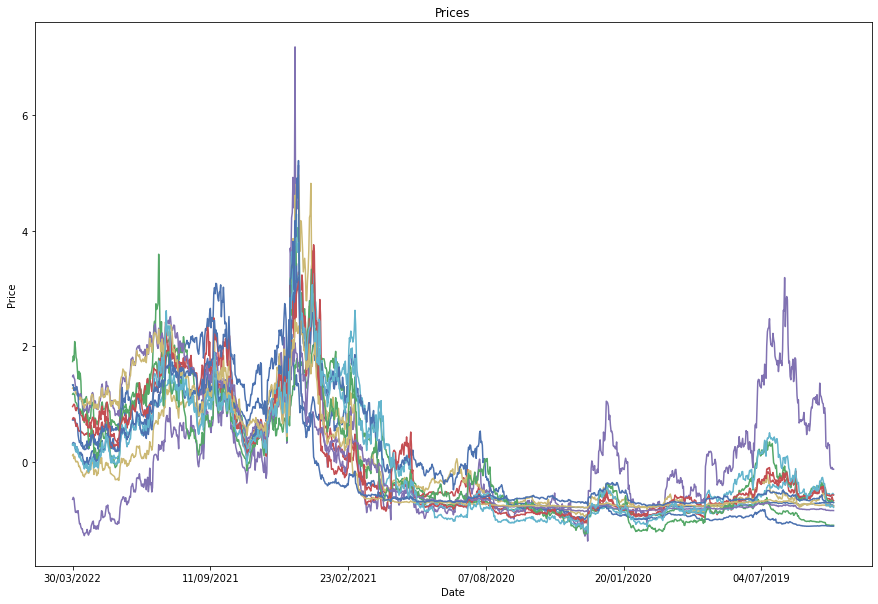

In [12]:
rescaledDataset.plot(figsize=(15,10),legend=False)
plt.ylabel("Price")
plt.title("Prices");

Another Method 

In [77]:
import matplotlib.pyplot as mpl
import scipy.cluster.hierarchy as sch,random,numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [64]:
cov,corr=rescaledDataset.cov(),rescaledDataset.corr()

In [65]:
corr.style.background_gradient(cmap='coolwarm')

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
_ADAUSDT_,1.000000,0.887290,0.901589,0.374658,0.784513,0.815911,0.841545,0.781976,0.894381,0.926407,0.907543,0.800363,0.895530
_BTCUSDT_,0.887290,1.000000,0.903899,0.300210,0.797479,0.904275,0.922974,0.867575,0.854252,0.924943,0.911286,0.889353,0.745035
_TRXUSDT_,0.901589,0.903899,1.000000,0.528929,0.895279,0.887734,0.887125,0.921669,0.966612,0.906501,0.943136,0.903201,0.850654
_EOSUSDT_,0.374658,0.300210,0.528929,1.000000,0.629786,0.565354,0.390271,0.572775,0.544149,0.270723,0.347010,0.659335,0.493266
_NEOUSDT_,0.784513,0.797479,0.895279,0.629786,1.000000,0.915495,0.901088,0.877359,0.873351,0.721317,0.786213,0.902649,0.802180
_XLMUSDT_,0.815911,0.904275,0.887734,0.565354,0.915495,1.000000,0.941992,0.896263,0.855655,0.789036,0.808912,0.955451,0.745020
_LINKUSDT_,0.841545,0.922974,0.887125,0.390271,0.901088,0.941992,1.000000,0.870939,0.840869,0.833653,0.831530,0.890375,0.758767
_ZECUSDT_,0.781976,0.867575,0.921669,0.572775,0.877359,0.896263,0.870939,1.000000,0.893923,0.841483,0.886499,0.921447,0.780438
_XRPUSDT_,0.894381,0.854252,0.966612,0.544149,0.873351,0.855655,0.840869,0.893923,1.000000,0.889613,0.925451,0.870369,0.877601
_ETHUSDT_,0.926407,0.924943,0.906501,0.270723,0.721317,0.789036,0.833653,0.841483,0.889613,1.000000,0.970605,0.797384,0.858327


compute the most simple and intuitively appealling allocation metric based on inverse variance

In [66]:
def getIVP(cov, **kargs):
    ivp=1./np.diag(cov)
    ivp/=ivp.sum()
    return ivp

In [67]:
ivp = getIVP(cov)

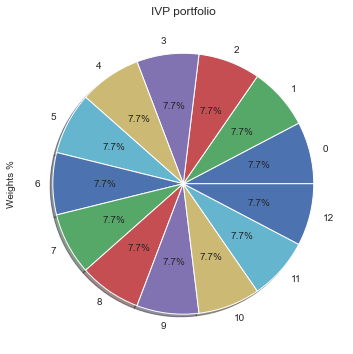

In [72]:
w = np.around(ivp*100, decimals=2)
w_ivp = pd.DataFrame(data = w)
w_ivp.columns =['Weights %']

plot = w_ivp.plot.pie(y='Weights %', title="IVP portfolio", legend=False, autopct='%1.1f%%', 
                   shadow=True, startangle=0, figsize=(6, 6))

In [73]:
def correlDist(corr):
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [74]:
dist = correlDist(corr)

In [75]:
link = linkage(dist,'single')

C:\Users\PRAJWA~1\AppData\Local\Temp/ipykernel_23544/1644287005.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist,'single')


Dendogram tree to visualise the conectedness of assets returns

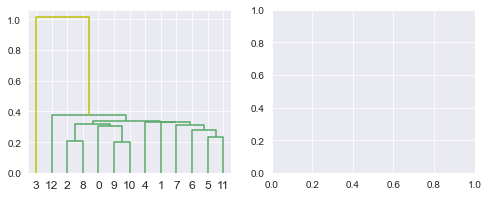

In [78]:
Z = pd.DataFrame(link)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
plt.show()

In [79]:
dist

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
_ADAUSDT_,0.000000,0.237392,0.221823,0.559170,0.328243,0.303388,0.281473,0.330170,0.229803,0.191824,0.215008,0.315940,0.228550
_BTCUSDT_,0.237392,0.000000,0.219204,0.591519,0.318214,0.218775,0.196247,0.257317,0.269952,0.193722,0.210611,0.235210,0.357047
_TRXUSDT_,0.221823,0.219204,0.000000,0.485320,0.228824,0.236924,0.237566,0.197903,0.129206,0.216216,0.168618,0.219999,0.273264
_EOSUSDT_,0.559170,0.591519,0.485320,0.000000,0.430241,0.466179,0.552145,0.462183,0.477416,0.603853,0.571397,0.412714,0.503356
_NEOUSDT_,0.328243,0.318214,0.228824,0.430241,0.000000,0.205555,0.222387,0.247629,0.251644,0.373285,0.326945,0.220626,0.314500
_XLMUSDT_,0.303388,0.218775,0.236924,0.466179,0.205555,0.000000,0.170305,0.227747,0.268649,0.324780,0.309102,0.149246,0.357058
_LINKUSDT_,0.281473,0.196247,0.237566,0.552145,0.222387,0.170305,0.000000,0.254028,0.282073,0.288398,0.290233,0.234120,0.347299
_ZECUSDT_,0.330170,0.257317,0.197903,0.462183,0.247629,0.227747,0.254028,0.000000,0.230301,0.281529,0.238224,0.198183,0.331332
_XRPUSDT_,0.229803,0.269952,0.129206,0.477416,0.251644,0.268649,0.282073,0.230301,0.000000,0.234933,0.193067,0.254589,0.247385
_ETHUSDT_,0.191824,0.193722,0.216216,0.603853,0.373285,0.324780,0.288398,0.281529,0.234933,0.000000,0.121234,0.318289,0.266152


 We are taking the shortest distance between the first cluster and the item. After we define distance between cluster and left items. Then, update by appending new cluster and dropping the clustered columns and rows. Repeat the procedure until we cover all items in the portfolio.

In [80]:
def getQuasiDiag(link):
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

In [81]:
sortIx = getQuasiDiag(link)
sortIx
sortIx = corr.index[sortIx].tolist()

Calculating HRP portfolio weigths

In [82]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

def getRecBipart(cov, sortIx):
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

In [83]:
w1 = getRecBipart(cov, sortIx)
np.around(w, decimals=3)

array([7.69, 7.69, 7.69, 7.69, 7.69, 7.69, 7.69, 7.69, 7.69, 7.69, 7.69,
       7.69, 7.69])

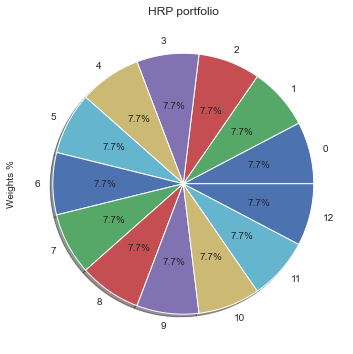

In [84]:
w = np.around(w1*100, decimals=2)
w_hrp = pd.DataFrame(data = w1)
w_hrp.columns =['Weights %']
#w_hrp.index = assets
plot = w_ivp.plot.pie(y='Weights %', title="HRP portfolio", legend=False, autopct='%1.1f%%', 
                   shadow=True, startangle=0, figsize=(6, 6))

In [85]:
df0=corr.loc[sortIx,sortIx]
df0

,_EOSUSDT_,_ETCUSDT_,_TRXUSDT_,_XRPUSDT_,_ADAUSDT_,_ETHUSDT_,_BNBUSDT_,_NEOUSDT_,_BTCUSDT_,_ZECUSDT_,_LINKUSDT_,_XLMUSDT_,_LTCUSDT_
_EOSUSDT_,1.000000,0.493266,0.528929,0.544149,0.374658,0.270723,0.347010,0.629786,0.300210,0.572775,0.390271,0.565354,0.659335
_ETCUSDT_,0.493266,1.000000,0.850654,0.877601,0.895530,0.858327,0.856636,0.802180,0.745035,0.780438,0.758767,0.745020,0.757889
_TRXUSDT_,0.528929,0.850654,1.000000,0.966612,0.901589,0.906501,0.943136,0.895279,0.903899,0.921669,0.887125,0.887734,0.903201
_XRPUSDT_,0.544149,0.877601,0.966612,1.000000,0.894381,0.889613,0.925451,0.873351,0.854252,0.893923,0.840869,0.855655,0.870369
_ADAUSDT_,0.374658,0.895530,0.901589,0.894381,1.000000,0.926407,0.907543,0.784513,0.887290,0.781976,0.841545,0.815911,0.800363
_ETHUSDT_,0.270723,0.858327,0.906501,0.889613,0.926407,1.000000,0.970605,0.721317,0.924943,0.841483,0.833653,0.789036,0.797384
_BNBUSDT_,0.347010,0.856636,0.943136,0.925451,0.907543,0.970605,1.000000,0.786213,0.911286,0.886499,0.831530,0.808912,0.823866
_NEOUSDT_,0.629786,0.802180,0.895279,0.873351,0.784513,0.721317,0.786213,1.000000,0.797479,0.877359,0.901088,0.915495,0.902649
_BTCUSDT_,0.300210,0.745035,0.903899,0.854252,0.887290,0.924943,0.911286,0.797479,1.000000,0.867575,0.922974,0.904275,0.889353
_ZECUSDT_,0.572775,0.780438,0.921669,0.893923,0.781976,0.841483,0.886499,0.877359,0.867575,1.000000,0.870939,0.896263,0.921447


Convenient graph displaying the visual features of correlation matricies before/after clusterring

In [86]:
def plotCorrMatrix(path,corr,labels = None):
    # Heatmap of the correlation matrix
    if labels is None:labels=[]
    mpl.pcolor(corr)
    mpl.colorbar()
    mpl.yticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.xticks(np.arange(.5,corr.shape[0]+.5),labels)
    mpl.savefig(path)
    mpl.clf();mpl.close() # reset pylab
    return

In [89]:
import os

os.chdir("C:/Users/Prajwal Kulkarni/Desktop")

plotCorrMatrix('HRP3_corr1.png',df0,labels=df0.columns)
plotCorrMatrix('HRP3_corr0.png',corr,labels=corr.columns)

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

Tree Data 

In [47]:
corr = rescaledDataset.corr()
cov = rescaledDataset.cov()

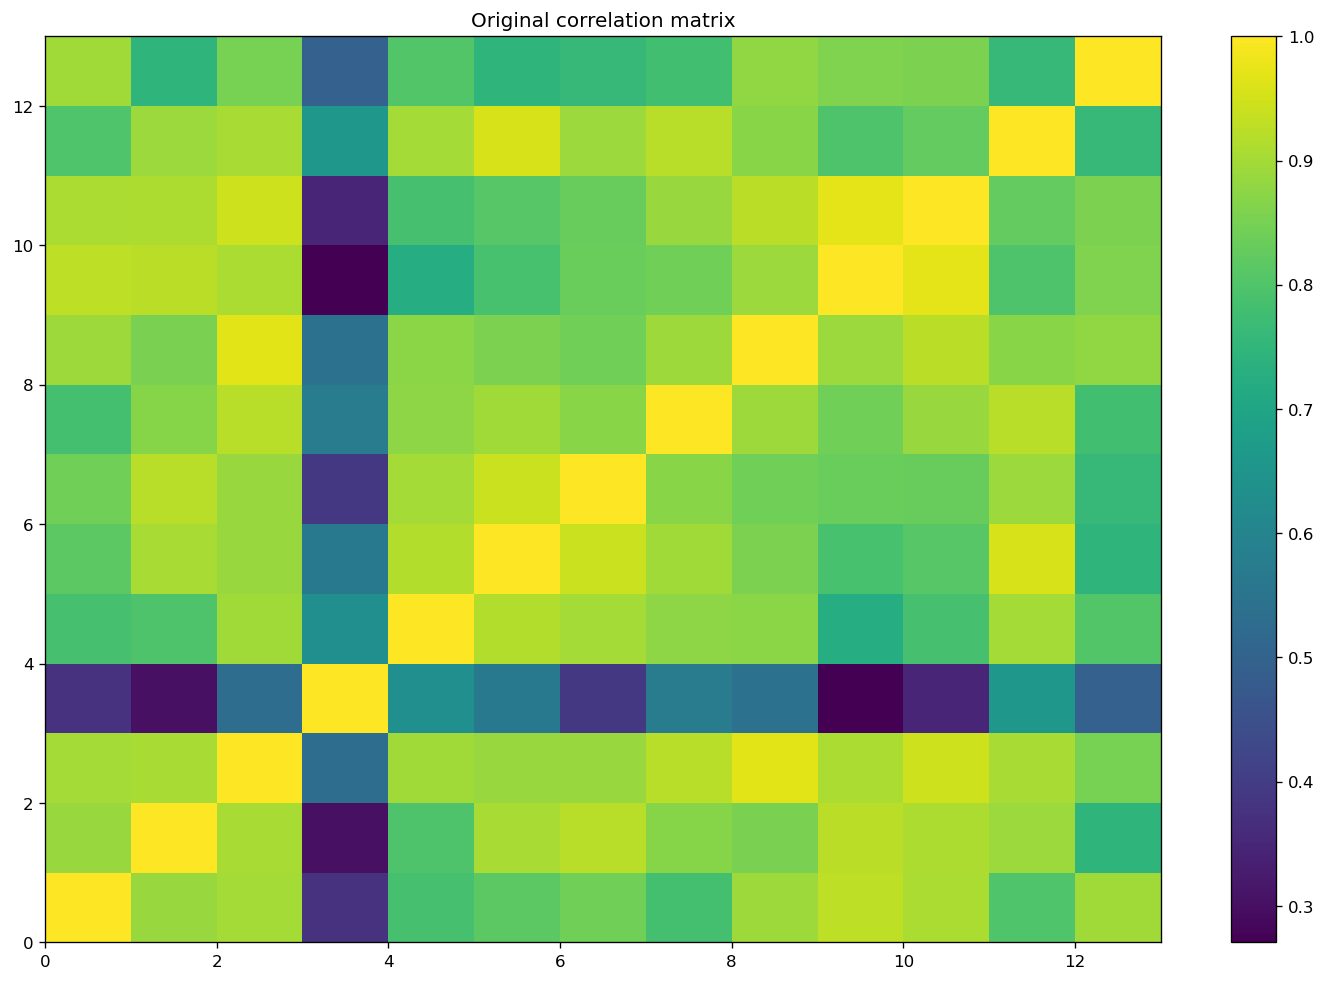

In [48]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('Original correlation matrix')
plt.show()

Distance 

In [49]:
# Distance Measure of original correlation matrix
d = np.sqrt((1 - corr) / 2)

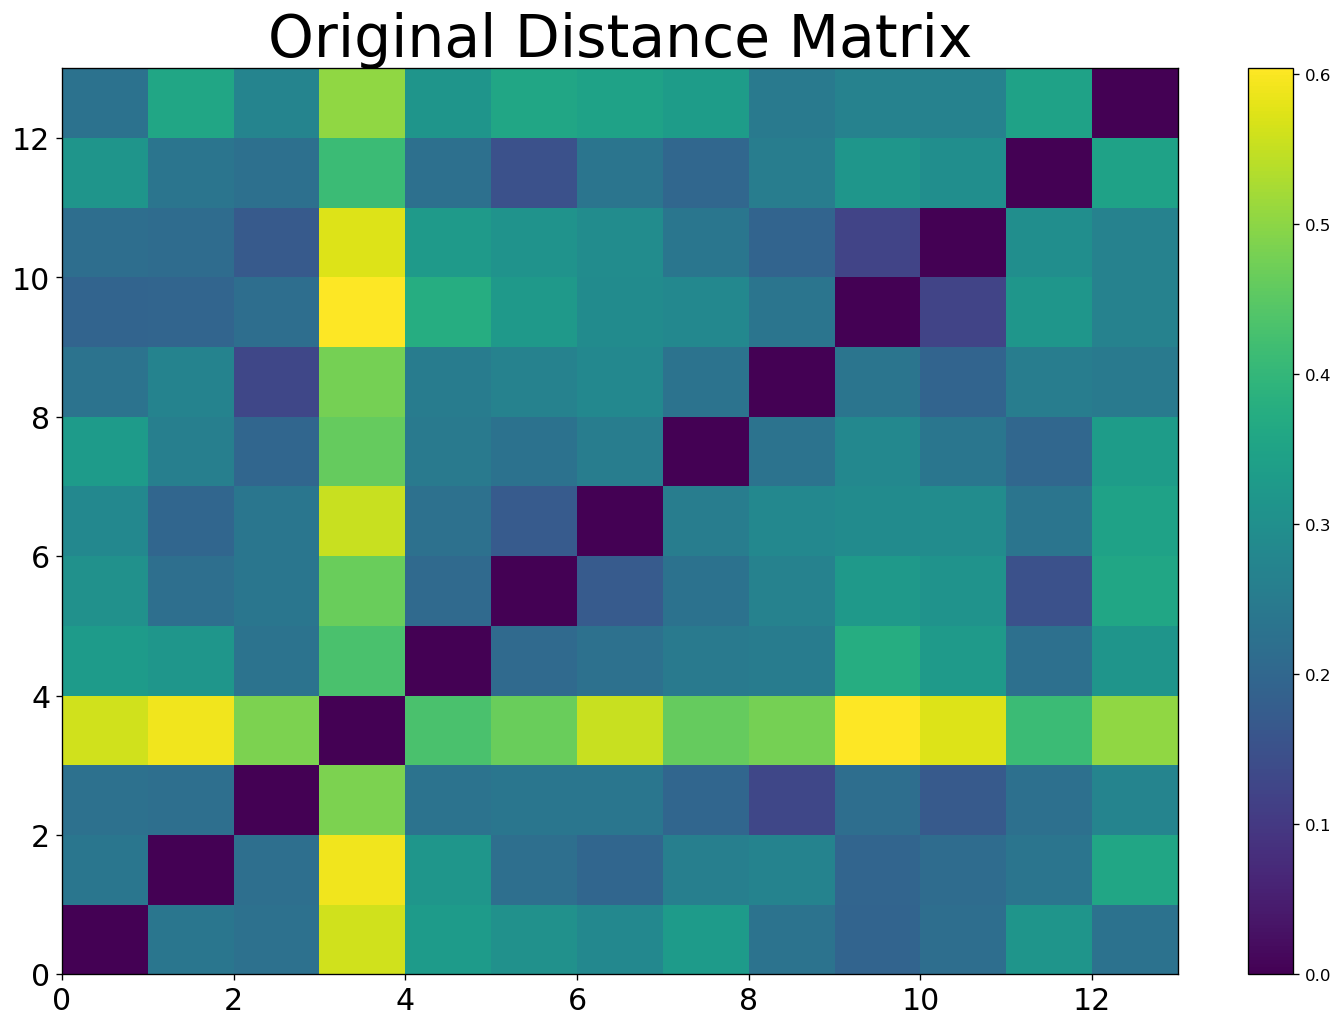

In [51]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(d)
plt.colorbar()
plt.title('Original Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [55]:
def tree_clustering(dist_mat, method="single", metric =  'eculidean'):
    flat_dist_mat = squareform(dist_mat) 
    res_linkage = linkage(flat_dist_mat, method=method, metric = metric)
    return res_linkage

res_linkage = tree_clustering(d)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

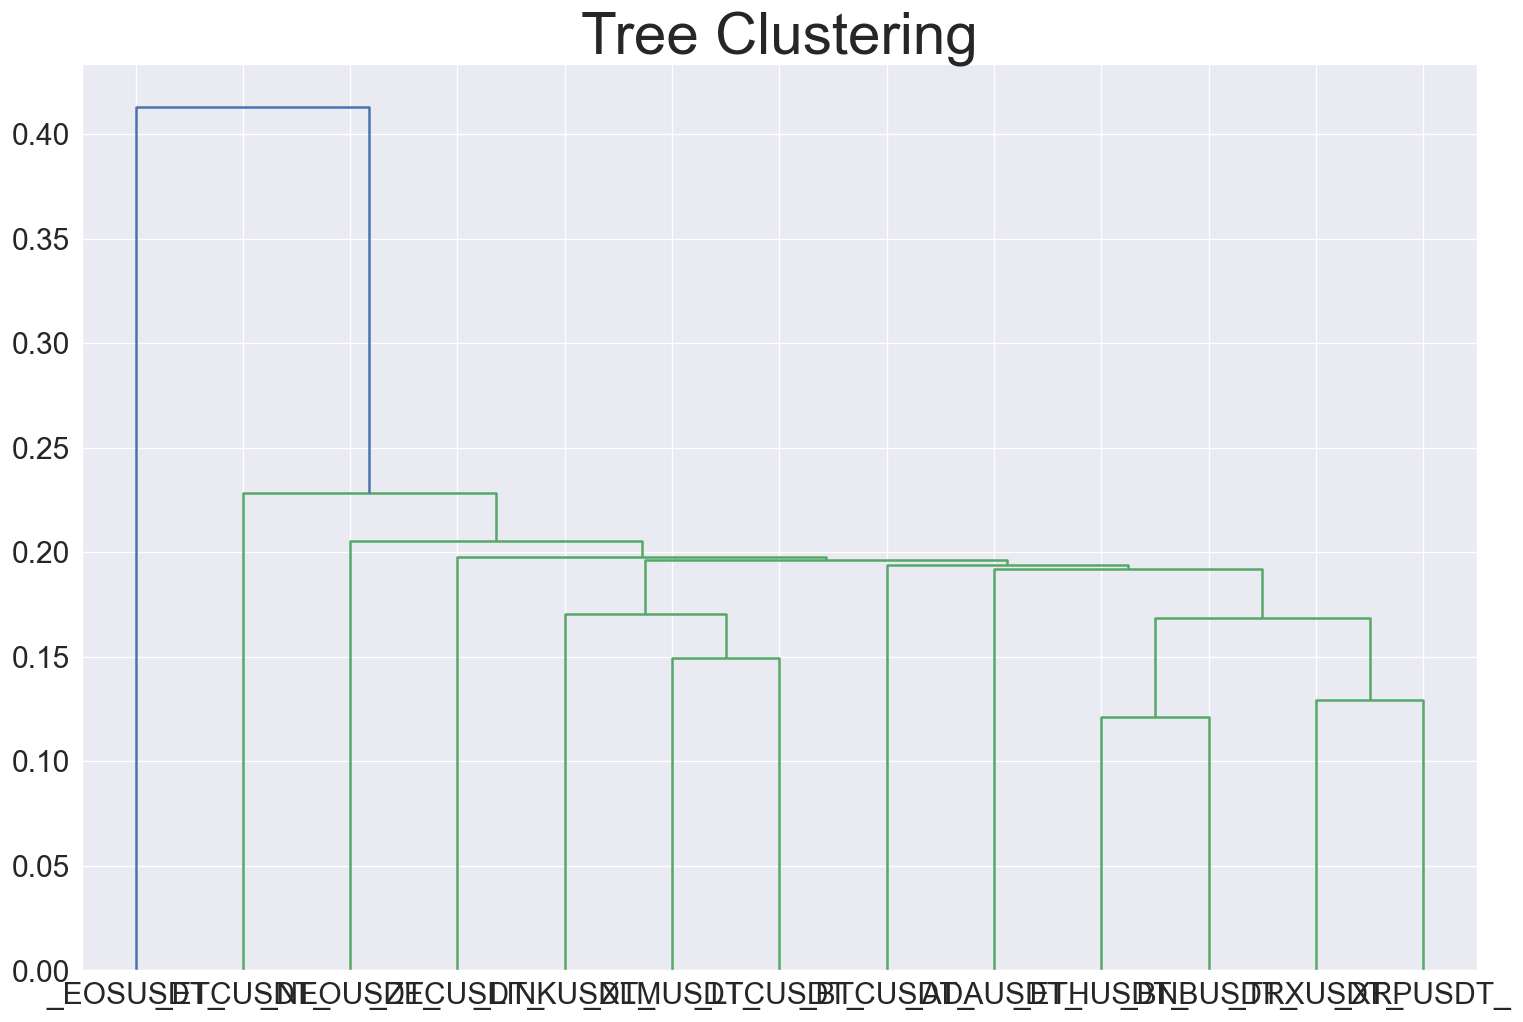

In [56]:
import seaborn as sns
# sns.set_context("talk")
sns.set_style("darkgrid")
plt.figure(figsize=(15,10),dpi=120)
dn = dendrogram(res_linkage, labels=corr.index.values) 
plt.title('Tree Clustering', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

The ordered distance matrix has brought the crypos with similar weights together 

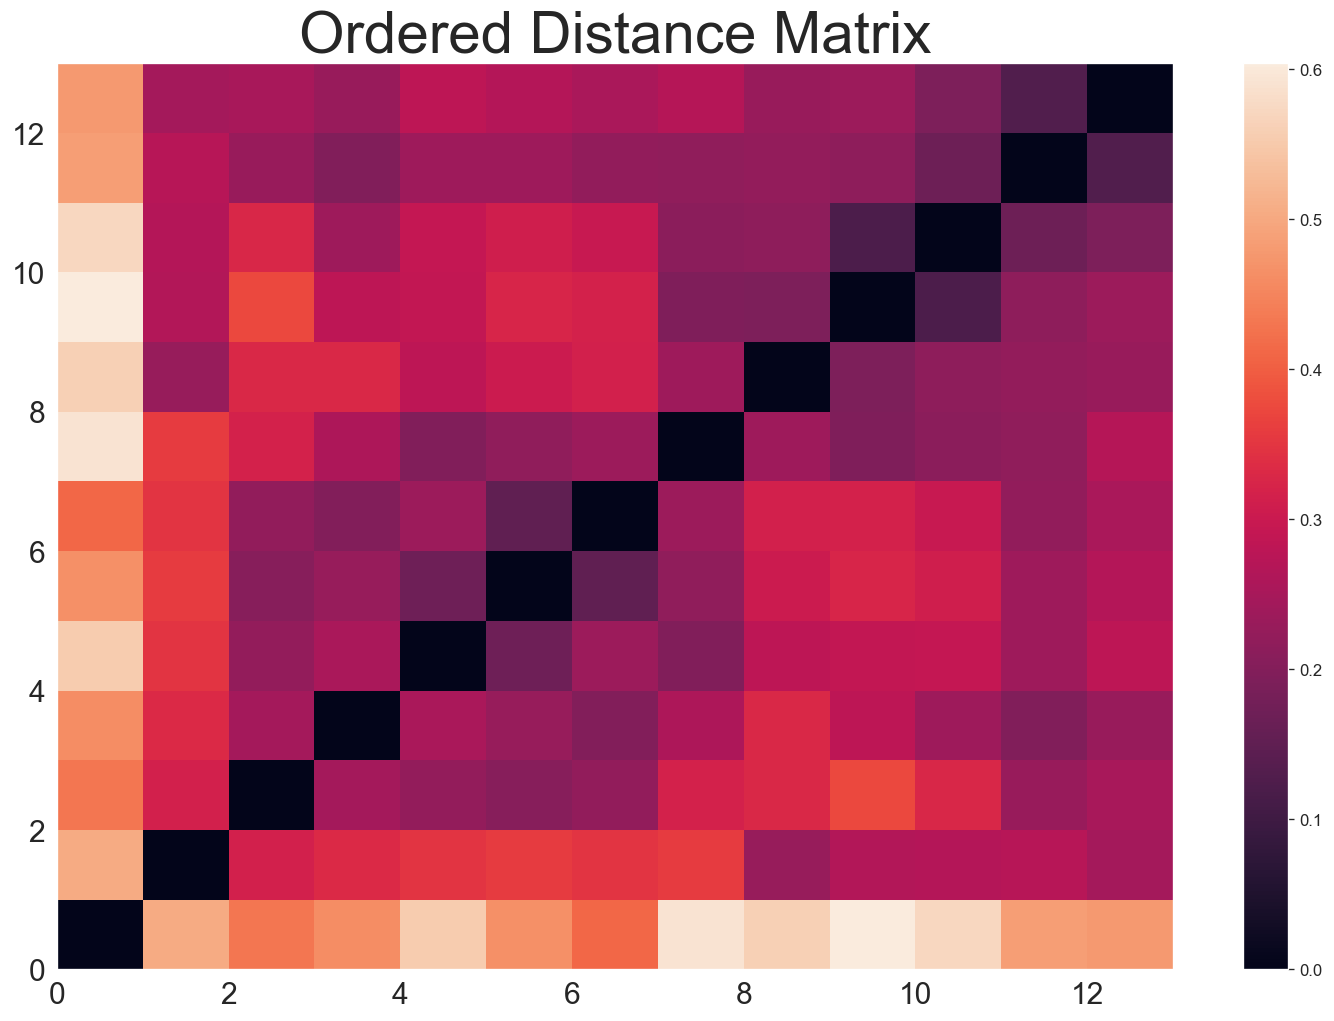

In [60]:
plt.figure(figsize=(15,10),dpi=120)
plt.pcolormesh(ordered_dist_mat)
plt.colorbar()
plt.title('Ordered Distance Matrix', fontsize=35)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [57]:
def seriation(Z, N, cur_index):
    """Returns the order implied by a hierarchical tree (dendrogram).
    
       :param Z: A hierarchical tree (dendrogram).
       :param N: The number of points given to the clustering process.
       :param cur_index: The position in the tree for the recursive traversal.
       
       :return: The order implied by the hierarchical tree Z.
    """
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index - N, 0])
        right = int(Z[cur_index - N, 1])
        return (seriation(Z, N, left) + seriation(Z, N, right))

def compute_serial_matrix(dist_mat, method="single"):
    """Returns a sorted distance matrix.
    
       :param dist_mat: A distance matrix.
       :param method: A string in ["ward", "single", "average", "complete"].
        
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    """
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    
    res_linkage = linkage(flat_dist_mat, method=method)
    res_order = seriation(res_linkage, N, N + N - 2)
    
    seriated_dist = np.zeros((N, N)) #ordered
    a,b = np.triu_indices(N, k=1)
    
    seriated_dist[a,b] = dist_mat[[res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b] #0
    
    return seriated_dist, res_order, res_linkage    

ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(d.values)

In [58]:
def compute_HRP_weights(covariances, res_order):
    weights = pd.Series(1, index=res_order)
    clustered_lists = [res_order] 
    while len(clustered_lists) > 0:
            # Bisect：clustered_lists list
            clustered_lists = [cluster[start:end] for cluster in clustered_lists
                                for start, end in ((0, len(cluster) // 2),
                                                   (len(cluster) // 2, len(cluster)))
                                if len(cluster) > 1]
            
            for subcluster in range(0, len(clustered_lists), 2):
                    left_cluster = clustered_lists[subcluster] # divide into groups every two lists; take the left cluster (list)
                    right_cluster = clustered_lists[subcluster + 1] # take the right cluster (list)

                    left_subcovar = covariances.iloc[left_cluster, left_cluster] # the covariance matrix of the indexes in left clusters
                    inv_diag = 1 / np.diag(left_subcovar.values) 
                    parity_w = inv_diag * (1 / np.sum(inv_diag)) 
                    left_cluster_var = np.dot(parity_w, np.dot(left_subcovar, parity_w)) 

                    right_subcovar = covariances.iloc[right_cluster, right_cluster] # the covariance matrix of the indexes in right clusters
                    inv_diag = 1 / np.diag(right_subcovar.values)
                    parity_w = inv_diag * (1 / np.sum(inv_diag))
                    right_cluster_var = np.dot(parity_w, np.dot(right_subcovar, parity_w))

                    alloc_factor = 1 - left_cluster_var / (left_cluster_var + right_cluster_var)

                    weights[left_cluster] *= alloc_factor #weightsof left_cluster index
                    weights[right_cluster] *= 1 - alloc_factor
    return weights               
compute_HRP_weights(cov, res_order)

3     0.140259
12    0.077827
4     0.077827
7     0.118628
6     0.061086
5     0.061086
11    0.115144
1     0.061010
0     0.061010
9     0.056473
10    0.056473
2     0.056588
8     0.056588
dtype: float64

In [13]:
def renormalize_weights(optimized_portfolio,cutoff=0.05):
    weights = optimized_portfolio.clean_weights(cutoff)
    weights = list(weights.items())
    cleaned_weights = []
    for i in range(len(weights)):
        if weights[i][1]!=0 :
            cleaned_weights.append(weights[i])
    total = 0
    y=[]
    for i in range(len(cleaned_weights)):
        total+=cleaned_weights[i][1]
    for i in range(len(cleaned_weights)):
        y.append((cleaned_weights[i][1]/total)) 
    cleaned_weights = dict(zip(list(dict(cleaned_weights).keys()),y))
    return cleaned_weights

In [14]:
returns = expected_returns.returns_from_prices(rescaledDataset).dropna()
hrp = HRPOpt(returns)
hrp.optimize()
weights = renormalize_weights(hrp,cutoff=0.02)
hrp.portfolio_performance(verbose=True,risk_free_rate=0.11);

Expected annual return: 99.7%
Annual volatility: 193.8%
Sharpe Ratio: 0.46


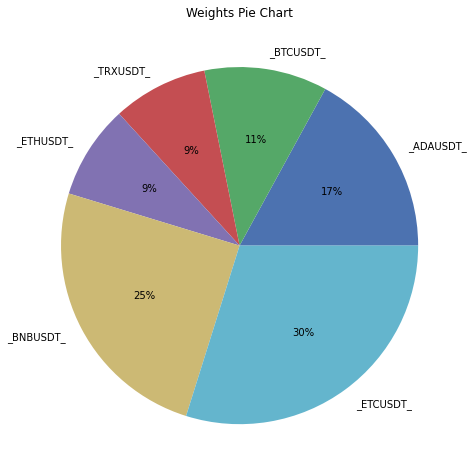

In [15]:
pd.Series(weights).plot.pie(normalize=True,figsize=(8,10),ylabel="",title="Weights Pie Chart",autopct='%1.0f%%');

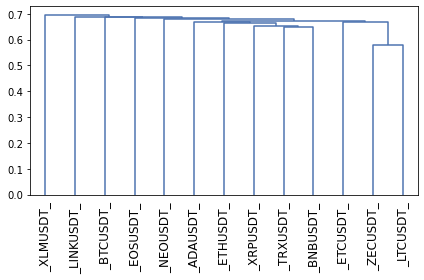

In [16]:
plotting.plot_dendrogram(hrp,show_tickers=True);

In [17]:
from pypfopt import HRPOpt,expected_returns, risk_models, plotting,EfficientFrontier,EfficientCVaR,CLA
import pypfopt

Mean - CVaR
Conditional value at risk is defined as the maximum dollar amount expected to be lost if the wort case scenario occurs, at a pre-defined confidence level. For example, if the 95% one-month VAR is 10,000, there is 95% confidence that over the next month the portfolio will not lose more than 10,000.

we will use capm model to measure returns
we will Covariance shirknage method to calculate risk, it is better than simple covariace matrix as it penalizes misspecified values. Covariance estimators without shrinkage are very sensitive to the presence of outliers in the data. Therefore, one should use robust covariance estimators to estimate the covariance of its real data sets.
Mean and CVaR will be optimized to find the least volatile portfolio. It has been found that min volatilty portfolios tend to outperform max sharpe ratio portfolios. And an efficient frontier will be plotted.

In [18]:
mu      = expected_returns.capm_return(rescaledDataset,risk_free_rate= 0.11,compounding=True).dropna()
S       = risk_models.CovarianceShrinkage(rescaledDataset).ledoit_wolf().dropna()

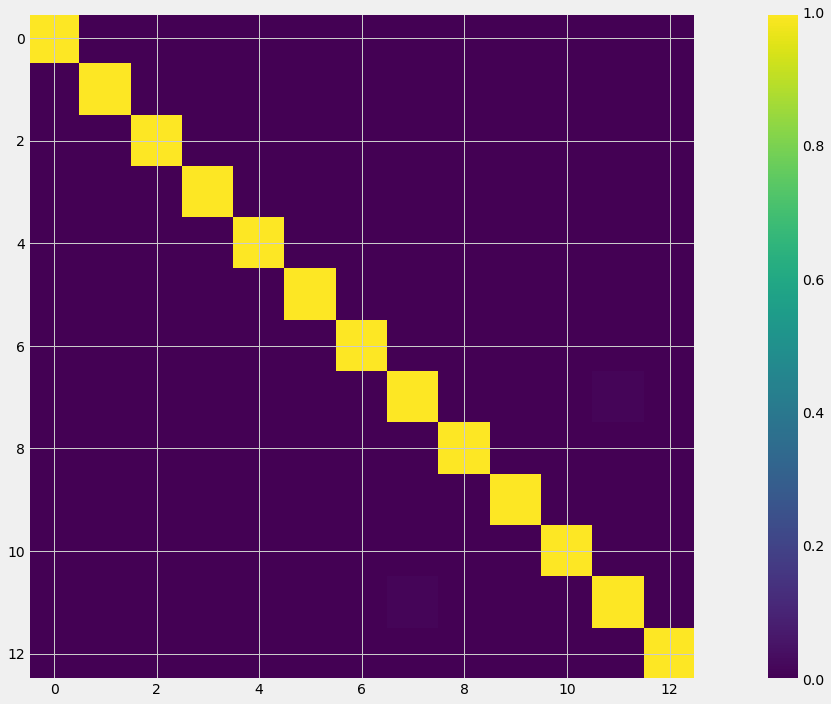

In [90]:
#Plot the covariance matrix
plotting.plot_covariance(S,plot_correlation=True,show_tickers=False);

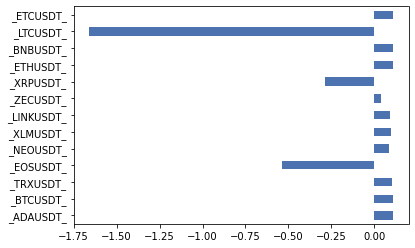

In [19]:
#Plot returns of each stock
mu.plot.barh();

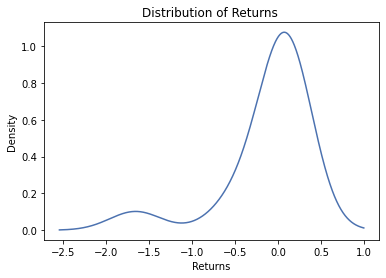

In [20]:
#Check if the returns are normally distributed
mu.plot.density()
plt.xscale("linear")
plt.xlabel("Returns")
plt.title("Distribution of Returns ");

In [21]:
ec = EfficientCVaR(mu, returns,weight_bounds=(0.0,0.25))
ec.add_objective(pypfopt.objective_functions.L2_reg,gamma=0.00001)

In [22]:
#Optimize 

#Use weight bound (min,max) for box constraints
#Decrease gamma to remove negligible weights



ec.min_cvar()
weights = renormalize_weights(ec,cutoff=0.02)
ec.portfolio_performance(verbose=True);

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

In [23]:
import scipy.cluster.hierarchy as sch

HRP Functions 

In [24]:
# compute the inverse-variance portfolio
def getIVP(cov, **kargs):
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

In [25]:
# compute variance per cluster
def getClusterVar(cov,cItems):
    cov_ = cov.loc[cItems,cItems] # matrix slice
    w_ = getIVP(cov_).reshape(-1,1)
    cVar = np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar

In [26]:
# sort clusters by distance
def getQuasiDiag(link):
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

In [27]:
# compute HRP allocation
def getRecBipart(cov, sortIx):
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

In [28]:
# define distance measure based on correlation, where 0<=d[i,j]<=1
def correlDist(corr):
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [29]:
# construct hierarchical portfolio
def getHRP(cov, corr):
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #dn = sch.dendrogram(link, labels=cov.index.values, label_rotation=90)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

Define Markowitz Portfolio functions, for comparison

In [67]:
def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # convert to cvxopt matrices
    S = opt.matrix(cov)
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # use quadratic programming to calculate efficient frontier weights
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x'] for mu in mus]
    # calculate risks and returns for the frontier
    returns = [blas.dot(pbar, x) for x in portfolios] # note that we need a returns "forecast"!
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    # calculate 2nd degree polynomial of the frontier curve
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # Ccalculate the optimal portfolio
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

Compare apporches 

In [68]:
# first, define a function to compare across all portfolio construction approaches
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    ivp = getIVP(cov)
    ivp = pd.Series(ivp, index=cov.index)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    
    portfolios = pd.DataFrame([mvp, ivp, hrp], index=['MVP', 'IVP', 'HRP']).T
    
    return portfolios

In [69]:
# compute portfolios
portfolios = get_all_portfolios(rescaledDataset)

C:\Users\PRAJWA~1\AppData\Local\Temp/ipykernel_22680/431134536.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, 'single')


     pcost       dcost       gap    pres   dres
 0: -9.5995e-01 -1.9873e+00  1e+00  3e-16  1e+00
 1: -9.6012e-01 -9.9689e-01  4e-02  6e-17  4e-02
 2: -9.6542e-01 -9.7609e-01  1e-02  4e-17  8e-17
 3: -9.6679e-01 -9.6958e-01  3e-03  6e-17  6e-17
 4: -9.6809e-01 -9.6867e-01  6e-04  7e-17  4e-17
 5: -9.6836e-01 -9.6840e-01  4e-05  6e-17  6e-17
 6: -9.6838e-01 -9.6839e-01  1e-06  2e-16  6e-17
 7: -9.6839e-01 -9.6839e-01  1e-07  2e-16  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5517e-01 -1.9855e+00  1e+00  1e-15  1e+00
 1: -9.5540e-01 -9.9495e-01  4e-02  2e-16  4e-02
 2: -9.6131e-01 -9.7324e-01  1e-02  1e-16  6e-17
 3: -9.6282e-01 -9.6588e-01  3e-03  2e-17  3e-17
 4: -9.6422e-01 -9.6481e-01  6e-04  2e-16  4e-17
 5: -9.6450e-01 -9.6454e-01  4e-05  1e-16  5e-17
 6: -9.6453e-01 -9.6453e-01  2e-06  1e-16  5e-17
 7: -9.6453e-01 -9.6453e-01  2e-07  1e-16  7e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4985e-01 -1.9834e

 4: -2.8682e-01 -2.9706e-01  1e-02  2e-16  2e-16
 5: -2.9185e-01 -2.9248e-01  6e-04  2e-16  2e-16
 6: -2.9223e-01 -2.9225e-01  3e-05  2e-16  1e-16
 7: -2.9224e-01 -2.9224e-01  3e-06  2e-16  2e-16
 8: -2.9224e-01 -2.9224e-01  2e-07  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9461e-01 -1.3424e+00  2e+01  4e+00  1e+00
 1: -7.5124e-02 -1.1455e+00  1e+00  5e-16  3e-16
 2: -1.2345e-01 -2.8847e-01  2e-01  9e-17  2e-16
 3: -1.7172e-01 -2.1667e-01  4e-02  5e-17  2e-16
 4: -2.0160e-01 -2.0874e-01  7e-03  8e-17  2e-16
 5: -2.0565e-01 -2.0601e-01  4e-04  2e-16  2e-16
 6: -2.0587e-01 -2.0589e-01  2e-05  2e-16  2e-16
 7: -2.0588e-01 -2.0588e-01  2e-06  6e-17  2e-16
 8: -2.0588e-01 -2.0588e-01  1e-07  6e-17  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1110e-01 -1.2504e+00  2e+01  4e+00  1e+00
 1:  2.9447e-02 -1.0484e+00  1e+00  5e-16  4e-16
 2: -2.3451e-02 -1.7893e-01  2e-01  9e-17  3e-16
 3: -8.3494e-02 -1.1749

 4:  1.6780e+01  1.6776e+01  5e-03  2e-04  5e-05
 5:  1.6778e+01  1.6778e+01  4e-04  1e-06  3e-07
 6:  1.6778e+01  1.6778e+01  5e-05  2e-16  6e-15
 7:  1.6778e+01  1.6778e+01  3e-06  1e-16  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2303e+00  1.2514e+01  5e+01  8e+00  2e+00
 1:  1.3573e+01  1.6406e+01  7e+00  1e+00  3e-01
 2:  1.8258e+01  1.8483e+01  1e+00  1e-01  4e-02
 3:  1.8984e+01  1.8916e+01  7e-02  1e-16  7e-15
 4:  1.8951e+01  1.8945e+01  5e-03  1e-16  6e-15
 5:  1.8948e+01  1.8947e+01  5e-04  2e-16  4e-15
 6:  1.8947e+01  1.8947e+01  6e-05  2e-16  7e-15
 7:  1.8947e+01  1.8947e+01  4e-06  2e-16  6e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0278e+01  1.3918e+01  5e+01  8e+00  2e+00
 1:  1.4941e+01  1.8369e+01  7e+00  1e+00  3e-01
 2:  2.0297e+01  2.0854e+01  2e+00  2e-01  5e-02
 3:  2.1425e+01  2.1332e+01  9e-02  2e-16  8e-15
 4:  2.1385e+01  2.1378e+01  7e-03  1e-16  7e-15
 5:  2.1382e+01  2.1381

 5:  3.5792e+02  3.8945e+02  2e+01  4e-01  1e-01
 6:  3.9600e+02  3.9622e+02  6e+00  3e-02  8e-03
 7:  3.9701e+02  3.9699e+02  1e-01  5e-04  1e-04
 8:  3.9700e+02  3.9700e+02  3e-03  7e-06  2e-06
 9:  3.9700e+02  3.9700e+02  1e-04  6e-08  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9841e+02  2.0745e+02  9e+01  1e+01  3e+00
 1:  2.0055e+02  2.3353e+02  5e+01  6e+00  2e+00
 2:  2.5777e+02  3.2893e+02  5e+01  3e+00  8e-01
 3:  3.1335e+02  3.8935e+02  5e+01  1e+00  4e-01
 4:  3.6264e+02  4.2143e+02  5e+01  8e-01  2e-01
 5:  3.9661e+02  4.3509e+02  3e+01  4e-01  1e-01
 6:  4.4673e+02  4.4416e+02  1e+01  3e-02  9e-03
 7:  4.4568e+02  4.4554e+02  3e-01  6e-04  2e-04
 8:  4.4557e+02  4.4557e+02  5e-03  8e-06  2e-06
 9:  4.4557e+02  4.4557e+02  9e-05  9e-08  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2271e+02  2.3181e+02  9e+01  1e+01  3e+00
 1:  2.2463e+02  2.5815e+02  5e+01  6e+00  2e+00
 2:  2.8711e+02  3.6558

C:\Users\PRAJWA~1\AppData\Local\Temp/ipykernel_22680/2809647682.py:8: RankWarning: Polyfit may be poorly conditioned
  mvp = getMVP(cov)


In [70]:
portfolios

,MVP,IVP,HRP
_ADAUSDT_,4.167203e-08,0.076923,0.060347
_BTCUSDT_,1.563329e-01,0.076923,0.063103
_TRXUSDT_,8.766669e-09,0.076923,0.076815
_EOSUSDT_,4.881286e-01,0.076923,0.142157
_NEOUSDT_,1.377381e-08,0.076923,0.063103
_XLMUSDT_,1.184591e-08,0.076923,0.055652
_LINKUSDT_,3.397855e-03,0.076923,0.058166
_ZECUSDT_,9.533356e-09,0.076923,0.058166
_XRPUSDT_,9.442179e-09,0.076923,0.116253
_ETHUSDT_,3.521404e-01,0.076923,0.060347


C:\Users\PRAJWA~1\AppData\Local\Temp/ipykernel_23544/72352704.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, 'single')


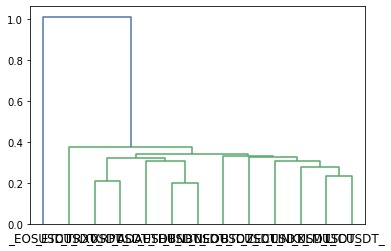

In [42]:
returns  = rescaledDataset
cov, corr = returns.cov(), returns.corr()
"""distance matrix based on correlation
this distance metric allows us to measure the distances between 
two column vectors
"""
dist = ((1-corr)/2) **(0.5)
"""perform hierarchical clustering, method='single',
returns the hierarchical clustering encoded as a linkage matrix,
link is (n-1) by 4 matrix Z returned, 
say Z[0] = [1, 2, 1.431223, 2] 
the first two value tells us which clusters were used to create cluster 0,
which are cluster 1 and cluster 2,
the third value gives us distance between two clusters,
the fourth value is the number of original observations in the newly formed cluster"""
link = sch.linkage(dist, 'single')
dn = sch.dendrogram(link, labels=cov.index.values)
plt.show()

In [43]:
"""matrix seriation -- quasi-diagonalisation,
return the sequence of dendrogram
rearrange the data to show the inherent clusters clearly,
so similar investment are placed together 
and dissimilar investment are placed far apart
- link cluster label is in cov.index.values
- link matrix combines to closest data points first
"""
link = link.astype(int)
sortIx = pd.Series([link[-1, 0], link[-1, 1]])
numItems = link[-1, 3]  # number of original items
while sortIx.max() >= numItems:
    sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
    df0 = sortIx[sortIx >= numItems]  # find clusters
    i = df0.index
    j = df0.values - numItems
    sortIx[i] = link[j, 0]  # item 1
    df0 = pd.Series(link[j, 1], index=i + 1)
    sortIx = sortIx.append(df0)  # item 2
    sortIx = sortIx.sort_index()  # re-sort
    sortIx.index = range(sortIx.shape[0])  # re-index
sortIx= sortIx.tolist()
sortIx = corr.index[sortIx].tolist()

In [44]:
w = pd.Series(1, index=sortIx)
cItems = [sortIx]  # initialize all items in one cluster
while len(cItems) > 0:
    
    # print(cItems)
    # separate each items in cItems list into two binary groups
    cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2),
     (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
    for i in range(0, len(cItems), 2):  # parse in pairs
        
        # assign inverse-variance portfolio weighting
        """inverse variance weighting is a method of aggregating two or more 
        random variables to minimize the variance of the weighted average,
        each variable is weights in inverse portion of its variane"""
        cItems0 = cItems[i]  # cluster 1
        cItems1 = cItems[i + 1]  # cluster 2
        cVar0 = getClusterVar(cov, cItems0)
        cVar1 = getClusterVar(cov, cItems1)
        alpha = 1 - cVar0 / (cVar0 + cVar1)
        w[cItems0] *= alpha  # weight 1
        w[cItems1] *= 1 - alpha  # weight 2
        # print('***')
        # print(cItems0, cItems1)
        # print(w)
w

_EOSUSDT_     0.142157
_ETCUSDT_     0.076815
_TRXUSDT_     0.076815
_XRPUSDT_     0.116253
_ADAUSDT_     0.060347
_ETHUSDT_     0.060347
_BNBUSDT_     0.113426
_NEOUSDT_     0.063103
_BTCUSDT_     0.063103
_ZECUSDT_     0.058166
_LINKUSDT_    0.058166
_XLMUSDT_     0.055652
_LTCUSDT_     0.055652
dtype: float64

In [36]:
from pypfopt import HRPOpt

In [37]:
hrp = HRPOpt(rescaledDataset)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('_ADAUSDT_', 0.06101),
             ('_BTCUSDT_', 0.06101),
             ('_TRXUSDT_', 0.05659),
             ('_EOSUSDT_', 0.14026),
             ('_NEOUSDT_', 0.07783),
             ('_XLMUSDT_', 0.06109),
             ('_LINKUSDT_', 0.06109),
             ('_ZECUSDT_', 0.11863),
             ('_XRPUSDT_', 0.05659),
             ('_ETHUSDT_', 0.05647),
             ('_BNBUSDT_', 0.05647),
             ('_LTCUSDT_', 0.11514),
             ('_ETCUSDT_', 0.07783)])

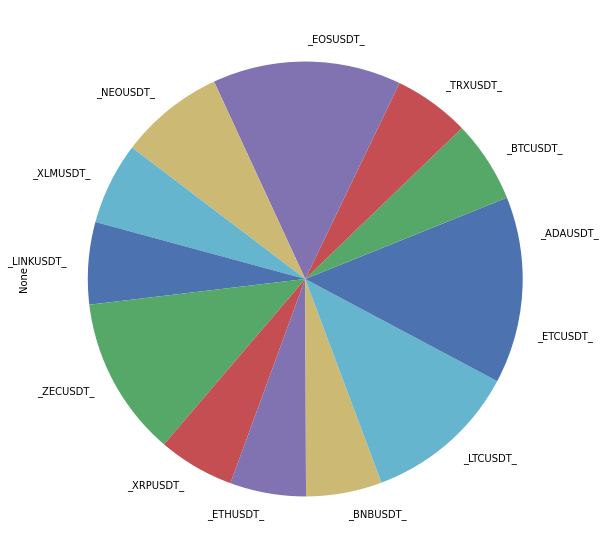

In [38]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [40]:
hrp.portfolio_performance(verbose=True);

Expected annual return: -0.0%
Annual volatility: 1407.7%
Sharpe Ratio: -0.00


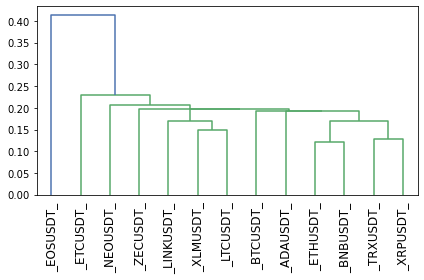

In [41]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);